In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

## Get data from wikipedia

In [7]:
# URL of the Wikipedia page
root = "https://en.wikipedia.org/wiki/List_of_verified_oldest_people"

# Send an HTTP GET request to fetch the web page content
response = requests.get(root)

# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table')

# Define a function to extract data from a table and add a gender column
def extract_and_add_gender(table, gender):
    df = pd.read_html(str(table), header=0)[0]
    df['gender'] = gender
    return df


# Extract and process data for old women
old_women_table = extract_and_add_gender(tables[0], 'female')

# Extract and process data for old men
old_men_table = extract_and_add_gender(tables[1], 'male')

# Now, you have the data for old women and old men in old_women_table and old_men_table DataFrames.


/var/folders/xj/z52r7g890j9bngvzbxw0fl8r0000gn/T/ipykernel_58336/1492967050.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table), header=0)[0]
/var/folders/xj/z52r7g890j9bngvzbxw0fl8r0000gn/T/ipykernel_58336/1492967050.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table), header=0)[0]


In [8]:
old_men_table

,Rank,Name[a],Birth date,Death date,Age,Place of death or residence,gender
0,1,Jiroemon Kimura,19 April 1897,12 June 2013,"116 years, 54 days",Japan,male
1,2,Christian Mortensen,16 August 1882,25 April 1998,"115 years, 252 days",United States[b],male
2,3,Emiliano Mercado del Toro,21 August 1891,24 January 2007,"115 years, 156 days",Puerto Rico,male
3,4,Walter Breuning,21 September 1896,14 April 2011,"114 years, 205 days",United States,male
4,5,Yukichi Chuganji,23 March 1889,28 September 2003,"114 years, 189 days",Japan,male
...,...,...,...,...,...,...,...
95,95,Melville Williams[116],21 February 1910,21 July 2021,"111 years, 150 days",Barbados[d],male
96,97,George Frederick Ives,17 November 1881,12 April 1993,"111 years, 146 days",Canada[m],male
97,98,Jan Goossenaerts,30 October 1900,21 March 2012,"111 years, 143 days",Belgium,male
98,99,Jerzy Pajączkowski-Dydyński[117],19 July 1894,6 December 2005,"111 years, 140 days",United Kingdom[n],male


In [9]:
old_women_table

,Rank,Name,Birth date,Death date,Age,Place of death or residence,gender
0,1,Jeanne Calment[9],21 February 1875,4 August 1997,"122 years, 164 days[b]",France,female
1,2,Kane Tanaka[7],2 January 1903,19 April 2022[10],"119 years, 107 days",Japan,female
2,3,Sarah Knauss[11],24 September 1880,30 December 1999,"119 years, 97 days",United States,female
3,4,Lucile Randon[12],11 February 1904,17 January 2023[13],"118 years, 340 days",France,female
4,5,Nabi Tajima[7],4 August 1900,21 April 2018,"117 years, 260 days",Japan,female
...,...,...,...,...,...,...,...
95,96,Faustina Sarmiento-Pupo[7],15 February 1905,16 September 2019,"114 years, 213 days",Cuba,female
96,97,Cecile Klein[7],15 June 1907,13 January 2022,"114 years, 212 days",Canada,female
97,98,Anna Eliza Williams[71],2 June 1873,27 December 1987,"114 years, 208 days",United Kingdom,female
98,99,Eleonora Camargo Veiga[72],14 August 1901,7 March 2016,"114 years, 206 days",Brazil,female


## Convert data into useful dataframe and remove brackets https://github.com/frankiethull/centenarians

In [10]:
# Define the column names
cols = ['rank', 'name', 'birth_date', 'death_date', 'age', 'place_of_death_or_residence', 'gender']

# Rename columns for old_women and old_men DataFrames
old_women_table.columns = cols
old_men_table.columns = cols

# Concatenate old_women and old_men DataFrames
old_ppl = pd.concat([old_women_table, old_men_table])

# Remove [reference] indices and fix date columns
old_ppl['name'] = old_ppl['name'].str.replace(r'\[.*\]', '', regex=True)
old_ppl['birth_date'] = old_ppl['birth_date'].str.replace(r'\[.*\]', '', regex=True)
old_ppl['death_date'] = old_ppl['death_date'].str.replace(r'\[.*\]', '', regex=True)
old_ppl['place_of_death_or_residence'] = old_ppl['place_of_death_or_residence'].str.replace(r'\[.*\]', '', regex=True)

# Convert date columns to datetime format
old_ppl['birth_date'] = pd.to_datetime(old_ppl['birth_date'], errors='coerce')
old_ppl['death_date'] = pd.to_datetime(old_ppl['death_date'], errors='coerce')

# Calculate age in years (including handling "alive" individuals)
old_ppl['still_alive'] = np.where(old_ppl['death_date'].isna(), 'alive', 'deceased')
old_ppl['age'] = np.where(old_ppl['still_alive'] == 'alive', 
                          (pd.to_datetime('today') - old_ppl['birth_date']).dt.days / 365.25, 
                          (old_ppl['death_date'] - old_ppl['birth_date']).dt.days / 365.25)


In [11]:
old_ppl

,rank,name,birth_date,death_date,age,place_of_death_or_residence,gender,still_alive
0,1,Jeanne Calment,1875-02-21,1997-08-04,122.447639,France,female,deceased
1,2,Kane Tanaka,1903-01-02,2022-04-19,119.293634,Japan,female,deceased
2,3,Sarah Knauss,1880-09-24,1999-12-30,119.260780,United States,female,deceased
3,4,Lucile Randon,1904-02-11,2023-01-17,118.932238,France,female,deceased
4,5,Nabi Tajima,1900-08-04,2018-04-21,117.711157,Japan,female,deceased
...,...,...,...,...,...,...,...,...
95,95,Melville Williams,1910-02-21,2021-07-21,111.411362,Barbados,male,deceased
96,97,George Frederick Ives,1881-11-17,1993-04-12,111.397673,Canada,male,deceased
97,98,Jan Goossenaerts,1900-10-30,2012-03-21,111.389459,Belgium,male,deceased
98,99,Jerzy Pajączkowski-Dydyński,1894-07-19,2005-12-06,111.381246,United Kingdom,male,deceased


## Actual visualisation

### Define styles

In [12]:
import matplotlib.font_manager as fm
from pathlib import Path

bkg_col      = '#a7b7d9'
title_col    = '#1a1a1a'           
subtitle_col = '#1a1a1a'  
caption_col  = '#1a1a1a'
text_col     = '#1a1a1a'
dot_col      = '#5d65aa'
dot_yel      = '#efc86e'

# Define a custom fonts
title_font = fm.FontProperties(fname=Path("./fonts/Anton/Anton-Regular.ttf"), size=30, weight='bold')
subtitle_font = fm.FontProperties(fname=Path("./fonts/Titillium_Web/TitilliumWeb-Regular.ttf"), size=13)
caption_font = fm.FontProperties(fname=Path("./fonts/PT_Sans_Narrow/PTSansNarrow-Regular.ttf"), size=10)
subtitle_font_yel = fm.FontProperties(fname=Path("./fonts/Titillium_Web/TitilliumWeb-SemiBold.ttf"), size=13)
icons_font = fm.FontProperties(fname=Path("./fonts/fa6-brands-regular-400.otf"))

tt = "#TidyTuesday: 2023 Week 21 \u2022 Source: Frankiethull: Centenarians repo\n"
tw_icon = "\uf099" 
gh_icon = "\uf09b"
mn_icon = "\uf4f6"

title_text = "Verified Oldest People"

subtitle_text = "The United States and Japan are the top 2 countries with the highest number\n" \
               "of Centenarians. However, only six percent are                  ."

caption_text = f"{tt} Visualization:      @sponce1 \u2022      @sponce1(graphic.social) Code:       poncest \u2022 Tools: #rstats #ggplot"

print(caption_text)

#TidyTuesday: 2023 Week 21 • Source: Frankiethull: Centenarians repo
 Visualization:      @sponce1 •      @sponce1(graphic.social) Code:       poncest • Tools: #rstats #ggplot


 ## Calculations for plot

In [13]:
# Group by gender and count
gender_counts = old_ppl.groupby('gender').size().reset_index(name='count')

# Group by place_of_death_or_residence and count, then arrange in descending order
place_counts = old_ppl.groupby('place_of_death_or_residence').size().reset_index(name='count')
place_counts = place_counts.sort_values(by='count', ascending=False)

# Group by place_of_death_or_residence and gender, then count, ungroup, and arrange in descending order
place_gender_counts = old_ppl.groupby(['place_of_death_or_residence', 'gender']).size().reset_index(name='count')
place_gender_counts = place_gender_counts.sort_values(by='count', ascending=False)

# Group by still_alive and count, then arrange in descending order
alive_counts = old_ppl.groupby('still_alive').size().reset_index(name='count')
alive_counts = alive_counts.sort_values(by='count', ascending=False)

# Add a new column 'birth_year' based on 'birth_date'
old_ppl['birth_year'] = old_ppl['birth_date'].dt.year
old_ppl["age"] = old_ppl["age"].astype(int)


In [14]:
old_ppl

,rank,name,birth_date,death_date,age,place_of_death_or_residence,gender,still_alive,birth_year
0,1,Jeanne Calment,1875-02-21,1997-08-04,122,France,female,deceased,1875
1,2,Kane Tanaka,1903-01-02,2022-04-19,119,Japan,female,deceased,1903
2,3,Sarah Knauss,1880-09-24,1999-12-30,119,United States,female,deceased,1880
3,4,Lucile Randon,1904-02-11,2023-01-17,118,France,female,deceased,1904
4,5,Nabi Tajima,1900-08-04,2018-04-21,117,Japan,female,deceased,1900
...,...,...,...,...,...,...,...,...,...
95,95,Melville Williams,1910-02-21,2021-07-21,111,Barbados,male,deceased,1910
96,97,George Frederick Ives,1881-11-17,1993-04-12,111,Canada,male,deceased,1881
97,98,Jan Goossenaerts,1900-10-30,2012-03-21,111,Belgium,male,deceased,1900
98,99,Jerzy Pajączkowski-Dydyński,1894-07-19,2005-12-06,111,United Kingdom,male,deceased,1894


In [15]:
# Create a dictionary to map place_of_death_or_residence to country
country_mapping = {
    "United States": "United States",
    "Japan": "Japan"
}

# Use the map function to create the 'country' column based on the mapping
old_ppl['country'] = old_ppl['place_of_death_or_residence'].map(country_mapping)

# Replace any other values with 'Others'
old_ppl['country'] = old_ppl['country'].fillna('Others').astype('category')

/var/folders/xj/z52r7g890j9bngvzbxw0fl8r0000gn/T/ipykernel_58336/4149388533.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(get_keys_from_value(location, i))
/var/folders/xj/z52r7g890j9bngvzbxw0fl8r0000gn/T/ipykernel_58336/4149388533.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(get_keys_from_value(location, i))
/var/folders/xj/z52r7g890j9bngvzbxw0fl8r0000gn/T/ipykernel_58336/4149388533.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(get_keys_from_value(location, i))


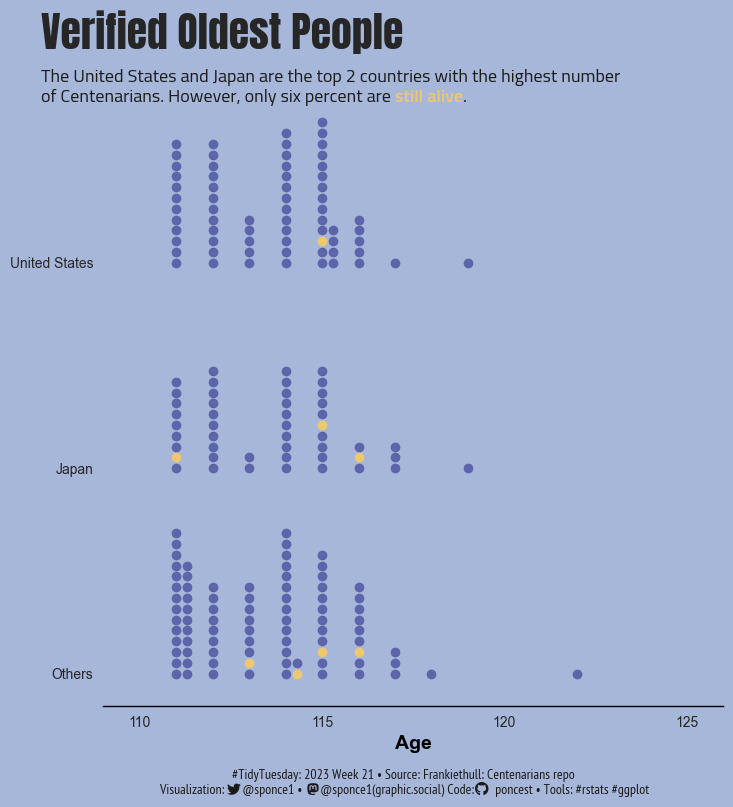

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def get_keys_from_value(dictionary, target_value):
    return [key for key, value in dictionary.items() if value == target_value]

x_ticks = [110,115,120,125] 
# Create the figure with subplots
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
fig.set_facecolor(bkg_col)  # Set the background color of whole graph
plt.subplots_adjust(hspace=0.0) 

#define what ax
location = {"United States": 0, "Japan": 1, "Others": 2}

for i in range(3):
    ax[i].set_facecolor(bkg_col) # set background color of ax
    ax[i].grid(axis="y", color=bkg_col, linewidth=1) #remove grid lines
    ax[i].grid(axis="x", color=bkg_col, linewidth=1)
    #change x axis labels
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels([str(age) for age in x_ticks])
    ax[i].set_xlim(x_ticks[0] - 1, x_ticks[-1] + 1) #extend line a little bit left and right
    # Remove spines
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    # Set the same y-tick positions for all subplots
    ax[i].set_yticklabels(get_keys_from_value(location, i))
    ax[i].set_yticks(range(16))
    ax[i].set_ylim(-3, 16)
    ax[i].tick_params(axis='y', labelsize=10) 

    #expect for last
    if i != 2:
        ax[i].set_xticks([])
        ax[i].spines['bottom'].set_visible(False)
    
#add bottom line only on lowest
ax[2].spines.bottom.set_color('black')
ax[2].spines.bottom.set_linewidth(1)
ax[2].spines.bottom.set_linestyle('-')
ax[2].set_xlabel('Age', fontsize=14, fontweight='bold', color='black')  # Set x-axis label to 'Age'

colormap = ListedColormap([dot_col, dot_yel])

# Create y-coordinates for each point
y_coords = {}
for country in old_ppl["country"].unique():
    y_coords[country] = {}

# Plot the data
for country in old_ppl['country'].unique():
    tmp_data = old_ppl.query('country == @country')
    for age, still_alive in zip(tmp_data['age'], tmp_data['still_alive']):
        if age not in y_coords[country]:
            y_coords[country][age] = 0
        else:
            if y_coords[country][age] >= 13:
                age = age + 0.3 #line breakage to stack next to it
                #check if new age is in the list to stack seperate column
                if age not in y_coords[country]:
                    y_coords[country][age] = 0
                else:
                    y_coords[country][age] += 1
            else: 
                y_coords[country][age] += 1
                
        color = colormap(0) if still_alive == 'deceased' else colormap(1)
        y = y_coords[country][age]
        ax[location[country]].scatter(age, y, label=f"{country}", color=color)
       

# Set titles
fig.suptitle(title_text, ha='right', va='top',fontproperties=title_font)
ax[0].text(-0.1, 1.1, subtitle_text, fontsize=13, color=subtitle_col, ha='left', va='top', transform=ax[0].transAxes,fontproperties=subtitle_font)
ax[0].text(0.47, 1.0, 'still alive', fontsize=13, color=dot_yel, ha='left', va='top', transform=ax[0].transAxes,fontproperties=subtitle_font_yel)

# Add a caption
fig.text(0.5, 0.00, caption_text, ha='center', fontsize=10, color=caption_col, fontproperties=caption_font)
fig.text(0.28, 0.00, tw_icon, ha='left', fontsize=10, color=caption_col, fontproperties=icons_font)
fig.text(0.38, 0.00, mn_icon, ha='left', fontsize=10, color=caption_col, fontproperties=icons_font)
fig.text(0.59, 0.00, gh_icon, ha='left', fontsize=10, color=caption_col, fontproperties=icons_font)
#Sorry i had to add it like this because i couldn't figure out how to do it in a nice way
plt.show()